In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data  into a dataframe
data = pd.read_csv(r'Advertising.csv',index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
print(data.dtypes)
print(data.shape)


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)


In [5]:
 data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
# data.boxplot()

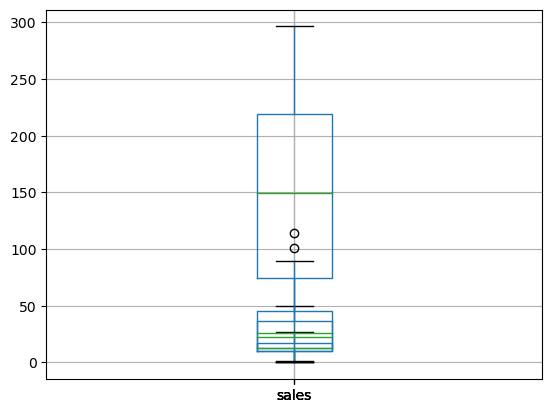

In [7]:
#assumption 1 : THere should be no outliers in the data
#Check using Boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show
#we can eliminate the two records from newspaper column which are outliers
#but they are not far from the whiskers so it is not a issue to keep it on the table 
#so as they are not extreme outliers too that's why we are not eliminating them 

In [1]:
#Assumption 2: Assumption of Linearity : Every Ind  var should have a linear relationship with the dependent var.

sns.pairplot(data,x_vars=['TV','newspaper','radio'],
            y_vars=['sales'],kind='reg')
plt.show()
#if a variable (newspaper) is not showing a linear relationship with the dependent variable (sales) 
#so ideally we can eliminate it

NameError: name 'sns' is not defined

In [9]:
#data.drop(['newspaper'],axis=1,inplace=True) 
#we can eliminate a varible through this command if it does not show linear relationship with dep var.

In [10]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
#create X and y
X = data.loc[:,['TV','radio','newspaper']]
Y= data.loc[:,'sales']

In [12]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [13]:
import warnings
warnings.filterwarnings("ignore")

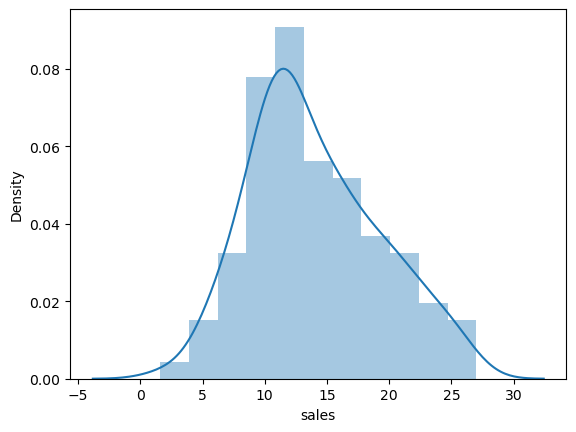

In [14]:
#Assumption Of Normality : the dependent variable should follow an approximate normal distribution
sns.distplot(Y)
plt.show()
# as we can see in the plot that our dep var is showing approximate normal distriution

In [15]:
#if the Y(dep) var does show a skewed distribution so we can use log transformation to make it a normal distribution
'''
Log transformation:
import numpy as np
Y_log = np.log(Y)
'''
#sns.distplot(Y_log,hist=True)
#plt.show()

'\nLog transformation:\nimport numpy as np\nY_log = np.log(Y)\n'

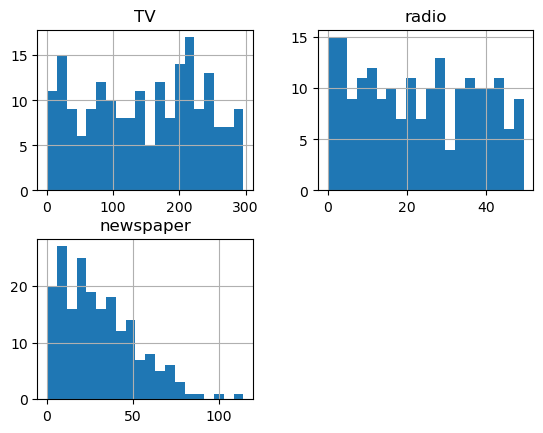

In [16]:
X.hist(bins=20)
plt.show()
#As its seem from the result the newspaper variable is right skewed

In [17]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#if we perform log(0) we end up getting -inf as a value which will through an error at a later stage
#in this case we can use log1p which will help us add 1 and then take a log transform to avoid -inf

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


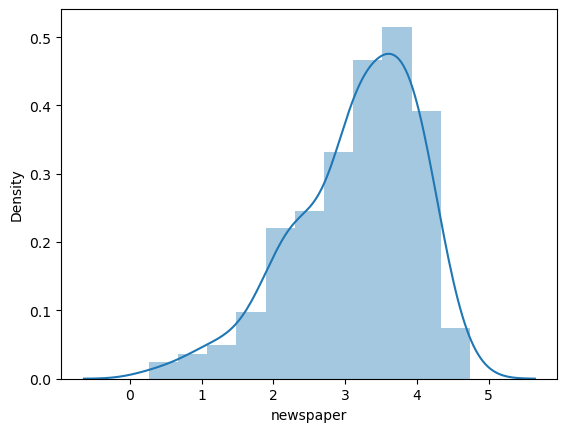

In [18]:
sns.distplot(X['newspaper'])
plt.show()

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


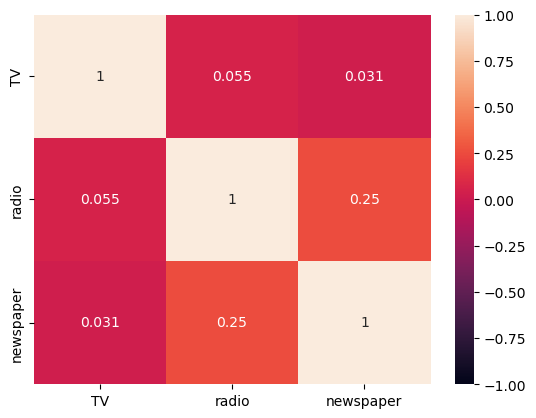

In [19]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()


In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

NameError: name 'pd' is not defined

In [ ]:
#ideally steps after getting a higher VIF value in a variable
#X.drop('newspaper',axis=1,inplace=True)
#rerun the VIF code if there are multiple higher VIF value variable
#eliminate only one variable at a time which shows the highest VIF value
#as the problematic variable gets eliminated the other variable will start having lower VIF values
#acceptable VIF values is less than 5 or in some case less than 10

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#print("Percent of train data", X_train.shape[0]/X.shape[0]*100)
#>1000---tes

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
klm = LinearRegression()
#train the model object
klm.fit(X_train,Y_train)

#print intercept and coefficients
print(klm.intercept_)
print(klm.coef_)

In [ ]:
#pair the features name with the coefficients
print(list(zip(X.columns,klm.coef_)))

In [ ]:
X1=100
X2=100
X3=np.log1p(100)
Y_pred=3.3532913858151474+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

In [ ]:
#predict using the model
Y_pred = klm.predict(X_test)
print(Y_pred)

In [ ]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [ ]:
new_df

# 21-10-2023

In [ ]:
new_df['Actual sales'].plot(color='blue')
new_df['Predicted sales'].plot(color='orange')
plt.show()

# Evaluation Metrics


In [ ]:
klm.score(X_train,Y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


In [ ]:
print(Y_test.min())
print(Y_test.max())

# R square and  Adj R square  are close to 1 hence it is a good model as well the RMSE  value is close to lower value range of Y  test .

In [ ]:
new_df['Residual']=new_df['Actual sales']-new_df['Predicted sales']
#new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)

print(rid.intercept_)
print(rid.coef_)

In [ ]:
Y_pred = rid.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


In [ ]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)

print(las.intercept_)
print(las.coef_)

In [ ]:
Y_pred = las.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

# 22-10-2023

In [ ]:
#OLS --> OLS(Y_train, X_train)
#ols --> ols(Y~X1+X2+X3)

In [ ]:
#fit(X_train,Y_train)-->sklearn
#Y~X1+X2+X3,data=df--> statsmodel

In [ ]:
new_df=pd.DataFrame()
new_df= X_train.copy()

new_df['sales']=Y_train.copy()
new_df.shape

In [ ]:
import statsmodels.formula.api as sm
#create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio ',
                 data=new_df).fit()

#print the coefficients
print(lm_model.params)
print(lm_model.summary())

'''
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]

'''

In [ ]:
# Note : Assumption No.5 : There should  be no auto-correlation in the data.
#Post Model Building
# Durbin-Watson Statistical Test (Found in Time Series Data) Range from 0 to 4.
# If the DW Test value is close to 2 then there is no auto correlation in the data.
# If the DW Test value is close to 0 then there is POSITIVE auto correlation in the data.
# If the DW Test value is close to 4 then there is NEGATIVE auto correlation in the data.


In [ ]:
Y_pred_New = lm_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_New)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_New))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

In [ ]:
Y_pred_Newer = lm_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_Newer)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_Newer))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

In [ ]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()
#obs-->The line should be  a random line and should not follow a wave like pattern or any other pattern

In [ ]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')

#Obs-->Error points should follow the red diagonal line.
#The Normal QQ plot is used to compare a given set of values with standard normal distributed data(theoretical quantiles)

In [ ]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y= model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()
#the line should be an approximate line and should not have a steep angle or a v-shape like.

Steps for Linear Regression:
1. *Create the dataframe properly-->pd.read_csv(),pd.read_excel()
2. *Preprocessing the data:
a. Feature selection-->domain knowledge,drop()
b. Handling missing values-->isnull().sum(),fillna(),dropna()
3. Assumption 1: There should be no outliers in the data-->boxplot()
4. *Assumption 2: Assumption of Linearity:Every ind var should have a linear relationship with the dep var-->pairplot(), drop()
5. *Create X and Y-->X=ind var, Y=dep var
6. Assumption 3: Assumption of Normality: The dependent variable should follow an approximate normal distribtion-->distplot(),log()
7. Checking and handling the skewness in the X vars-->skew(),hist(),log1p()
8. Assumption 4: Assumption of no multicollinearity: There should be no multicollinearity between the independent variables-->corr(),heatmap(),vif(),drop()
9. *Splitting the data into train and test(validation)-->train_test_split()
10. *Building the model:
a. Create the model-->obj=AlgoName()
b. Train the model-->obj.fit(X_train, Y_train)
c. Predict using the model-->Y_pred=obj.predict(X_test)
11. *Evaluating the model:
R-squared, Adj R-squared, RMSE, AIC/BIC
12. Assumption 5: There should be no auto-correlation in the data-->Durbin Watson test
13. Assumption 6: Errors should be random-->Fitted v/s Residual plot
14. Assumption 7: Errors should follow an approx normal distribution-->Normal QQ plot
15. Assumption 8: Errors should should follow a constant variance(Homoskedasticity)-->Scale Location plot
16. *Tuning the model:
a. Feature selection-->p-values,domain knowledge
b. Regularization techniques-->Ridge(), Lasso()
c. Stochastic Gradient Descent-->SGDRegressor()